In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
df = pd.read_excel('heartpred.xlsx')  # Use the actual filename)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape #Returns no.of rows and columns

(303, 14)

In [52]:
df.info() #NO null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [53]:
df.describe() #statistical values of all the attributes

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [54]:
df.target.value_counts() #Main focus of the project is to make relation to the 'target' column

target
1    165
0    138
Name: count, dtype: int64

In [55]:
df.isnull().sum() #Count of All null values in the data

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [56]:
#Finding the categorical and continous columns for further data processing
catg_val = []
cont_val = []
for column in df.columns:
    if len(df[column].unique())<= 10:
        catg_val.append(column)
    else:
        cont_val.append(column)
print("Categorical columns: ", catg_val)
print("Continuous columns: ", cont_val)

Categorical columns:  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Continuous columns:  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


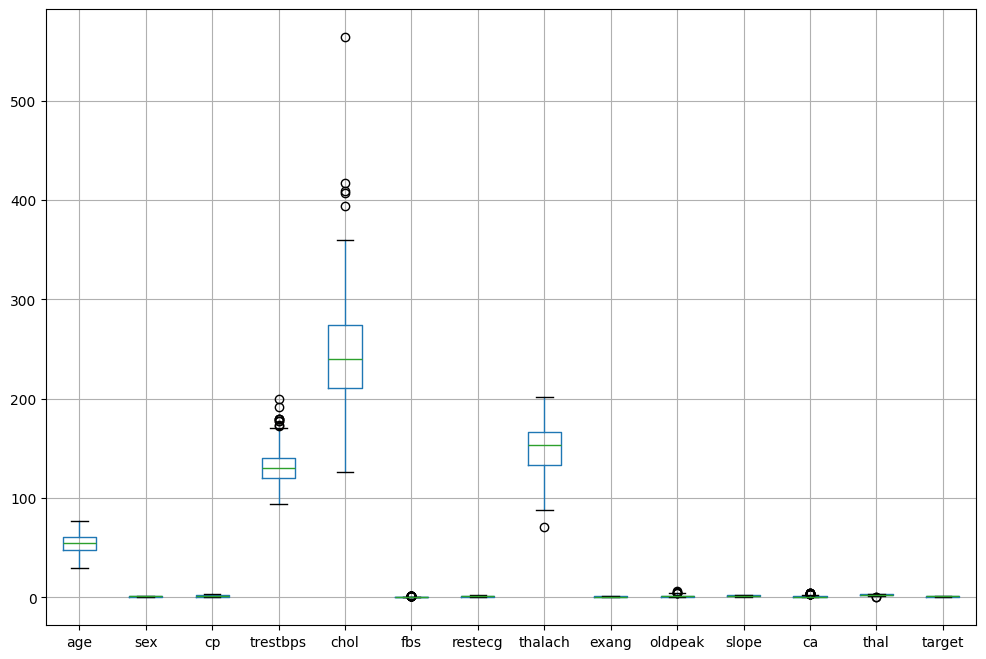

In [57]:
plt.figure(figsize=(12,8))
plt.tight_layout()
df.boxplot()
plt.show()

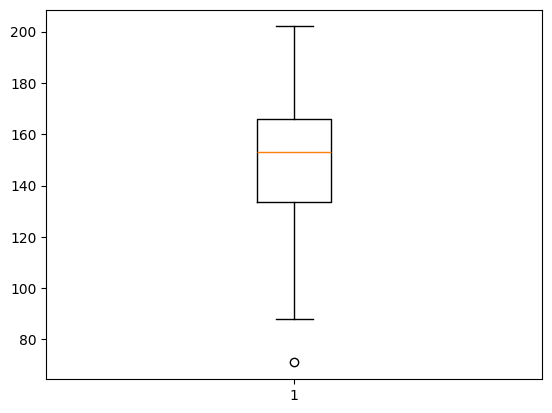

In [58]:
plt.boxplot(df["thalach"])
plt.show()

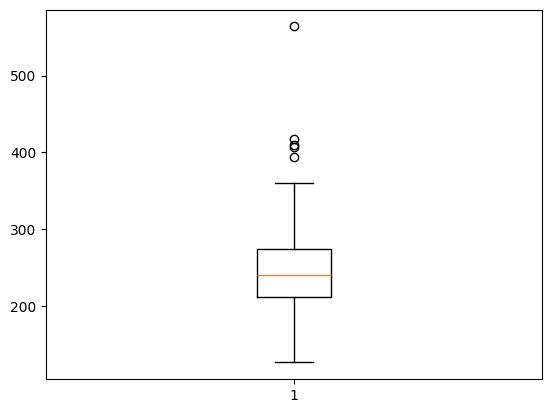

In [10]:
plt.boxplot(df["chol"])
plt.show()

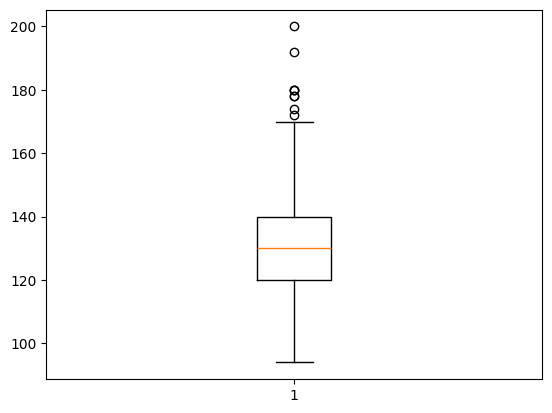

In [59]:
plt.boxplot(df["trestbps"])
plt.show()

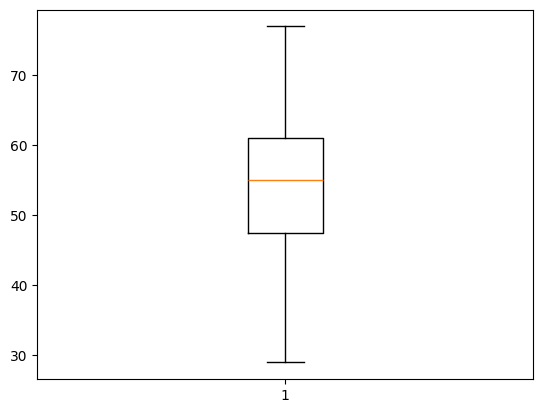

In [60]:
plt.boxplot(df["age"])
plt.show()

In [62]:
#outlier detection in thalach
q1 = df['thalach'].quantile(0.25)
q3 = df['thalach'].quantile(0.75)

newdf = df.copy()
iqr = q3 - q1

print(q1, q3, iqr)
print("Lower limit:", q1 - 1.5*iqr)
print("Upper limit:", q3 + 1.5*iqr)

print('Outliers:', end=" ")

for element in list(df['thalach']):
    if element < q1 - 1.5*iqr or element > q3 + 1.5*iqr:
        x=element
        print(element, end = " ")
lower_limit = df['thalach'].mean() - 3*df['thalach'].std()
upper_limit = df['thalach'].mean() + 3*df['thalach'].std()
print("\nAfter replacing outlietrs:")
newdf["thalach"] = np.where(df["thalach"] <q1 - 1.5*iqr, lower_limit,df['thalach'])
newdf["thalach"] = np.where(df["thalach"] >q3 + 1.5*iqr, upper_limit,df['thalach'])
newdf

133.5 166.0 32.5
Lower limit: 84.75
Upper limit: 214.75
Outliers: 71 
After replacing outlietrs:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163.0,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123.0,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132.0,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141.0,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115.0,1,1.2,1,1,3,0


In [63]:
q1 = df['chol'].quantile(0.25)
q3 = df['chol'].quantile(0.75)

iqr = q3 - q1

print(q1, q3, iqr)
print("Lower limit:", q1 - 1.5*iqr)
print("Upper limit:", q3 + 1.5*iqr)

print('Outliers:', end=" ")

for element in list(df['chol']):
    if element < q1 - 1.5*iqr or element > q3 + 1.5*iqr:
        print(element, end = " ")
lower_limit = df['chol'].mean() - 3*df['chol'].std()
upper_limit = df['chol'].mean() + 3*df['chol'].std()
print("\nAfter replacing outlietrs:")
newdf["chol"] = np.where(df["chol"] <q1 - 1.5*iqr, lower_limit,df['chol'])
newdf["chol"] = np.where(df["chol"] >q3 + 1.5*iqr, upper_limit,df['chol'])
newdf

211.0 274.5 63.5
Lower limit: 115.75
Upper limit: 369.75
Outliers: 417 564 394 407 409 
After replacing outlietrs:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,120,354.0,0,1,163.0,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241.0,0,1,123.0,1,0.2,1,0,3,0
299,45,1,3,110,264.0,0,1,132.0,0,1.2,1,0,3,0
300,68,1,0,144,193.0,1,1,141.0,0,3.4,1,2,3,0
301,57,1,0,130,131.0,0,1,115.0,1,1.2,1,1,3,0


In [64]:
q1 = df['trestbps'].quantile(0.25)
q3 = df['trestbps'].quantile(0.75)

iqr = q3 - q1

print(q1, q3, iqr)
print("Lower limit:", q1 - 1.5*iqr)
print("Upper limit:", q3 + 1.5*iqr)

print('Outliers:', end=" ")

for element in list(df['trestbps']):
    if element < q1 - 1.5*iqr or element > q3 + 1.5*iqr:
        print(element, end = " ")
lower_limit = df['trestbps'].mean() - 3*df['trestbps'].std()
upper_limit = df['trestbps'].mean() + 3*df['trestbps'].std()
print("\nAfter replacing outlietrs:")
newdf["trestbps"] = np.where(df["trestbps"] <q1 - 1.5*iqr, lower_limit,df['trestbps'])
newdf["trestbps"] = np.where(df["trestbps"] >q3 + 1.5*iqr, upper_limit,df['trestbps'])
newdf

120.0 140.0 20.0
Lower limit: 90.0
Upper limit: 170.0
Outliers: 172 178 180 180 200 174 192 178 180 
After replacing outlietrs:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,0
299,45,1,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,0
300,68,1,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,0
301,57,1,0,130.0,131.0,0,1,115.0,1,1.2,1,1,3,0


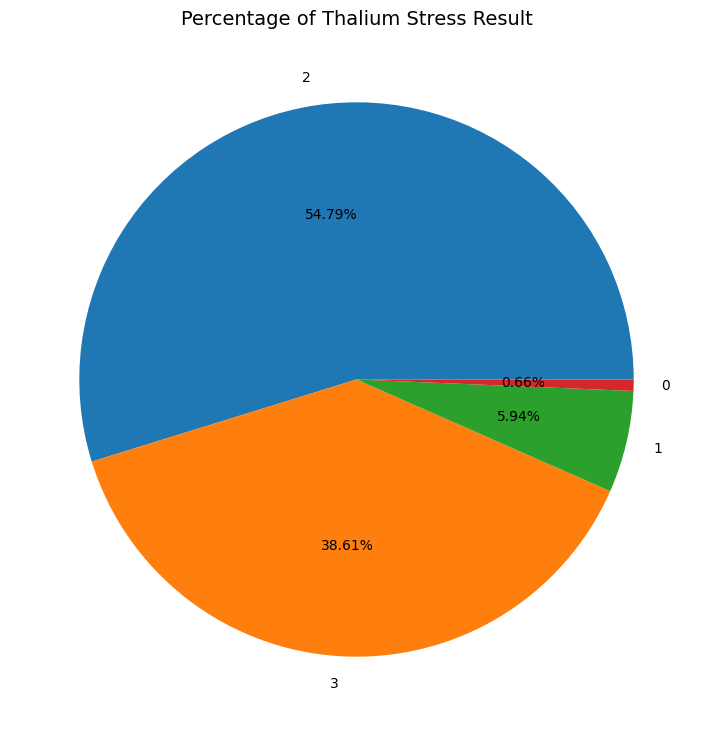

In [65]:
#Percentage of thalium stress result among patients
plt.figure(figsize=(10,9))
df1 = df['thal'].value_counts()
plt.pie(df1.values, labels=df1.index, autopct='%0.2f%%')
plt.title('Percentage of Thalium Stress Result', fontsize=14)
plt.show()  

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

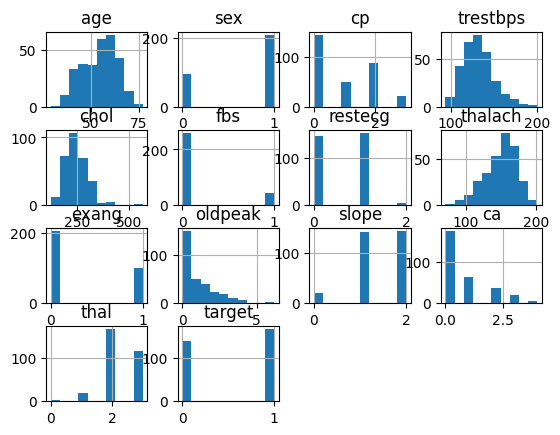

In [66]:
df.hist() #Graphs showing the frequency distribution of all the attributes

In [67]:
pip install hvplot


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 4.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 6.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 6.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import hvplot.pandas
df.target.value_counts().hvplot.bar(
    title="Count of Heart Disease: ", xlabel='Heart Disease', ylabel='Count', width=500, height=350, color='orange'
)

:Bars   [target]   (count)

In [6]:
#From the below graph we can infer the count of heart disease a male and female
have_dis = df.loc[df['target']==1, 'sex'].value_counts().hvplot.bar(alpha=0.5) 
no_dis = df.loc[df['target']==0, 'sex'].value_counts().hvplot.bar(alpha=0.5) 
(no_dis * have_dis).opts(
    title="Heart Disease by Sex", xlabel='Sex', ylabel='Count',width=500, height=450)

:Overlay
   .Bars.Count.I  :Bars   [sex]   (count)
   .Bars.Count.II :Bars   [sex]   (count)

In [70]:
have_dis = df.loc[df['target']==1, 'restecg'].value_counts().hvplot.bar(alpha=0.5) 
no_dis = df.loc[df['target']==0, 'restecg'].value_counts().hvplot.bar(alpha=0.5) 
(no_dis * have_dis).opts(
    title="Heart Disease by electrocardiographic results", xlabel='Fasting blood pressure', ylabel='Count',width=500, height=450)

:Overlay
   .Bars.Count.I  :Bars   [restecg]   (count)
   .Bars.Count.II :Bars   [restecg]   (count)

In [71]:
pip install seaborn matplotlib --upgrade



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


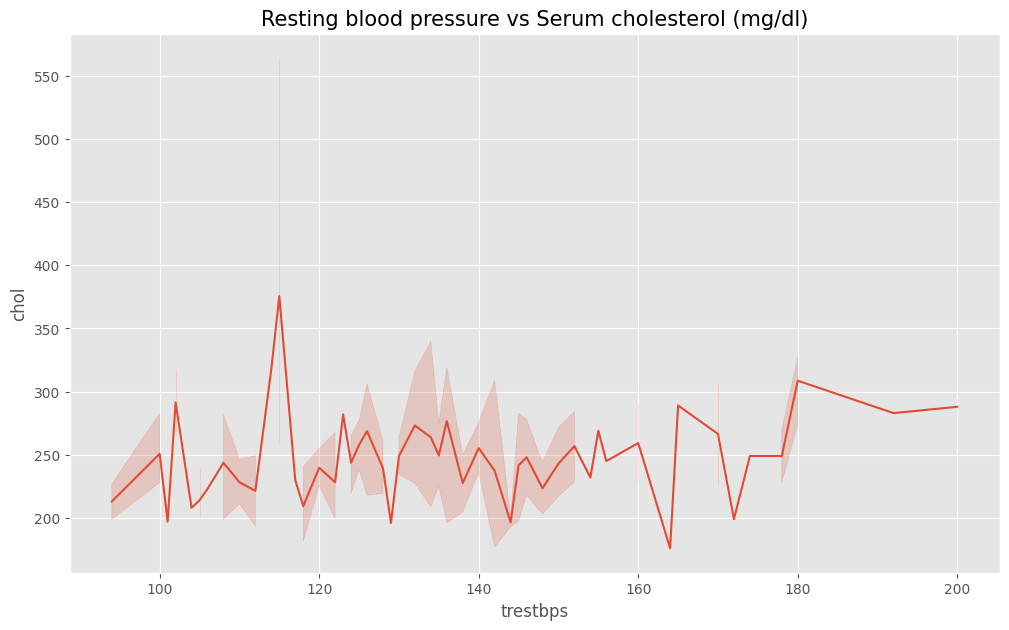

In [72]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# Plotting
plt.figure(figsize=(12, 7))
plt.style.use('ggplot')  # Alternative style
sns.lineplot(x=df['trestbps'], y=df['chol'])
plt.title('Resting blood pressure vs Serum cholesterol (mg/dl)', fontsize=15)
plt.show()


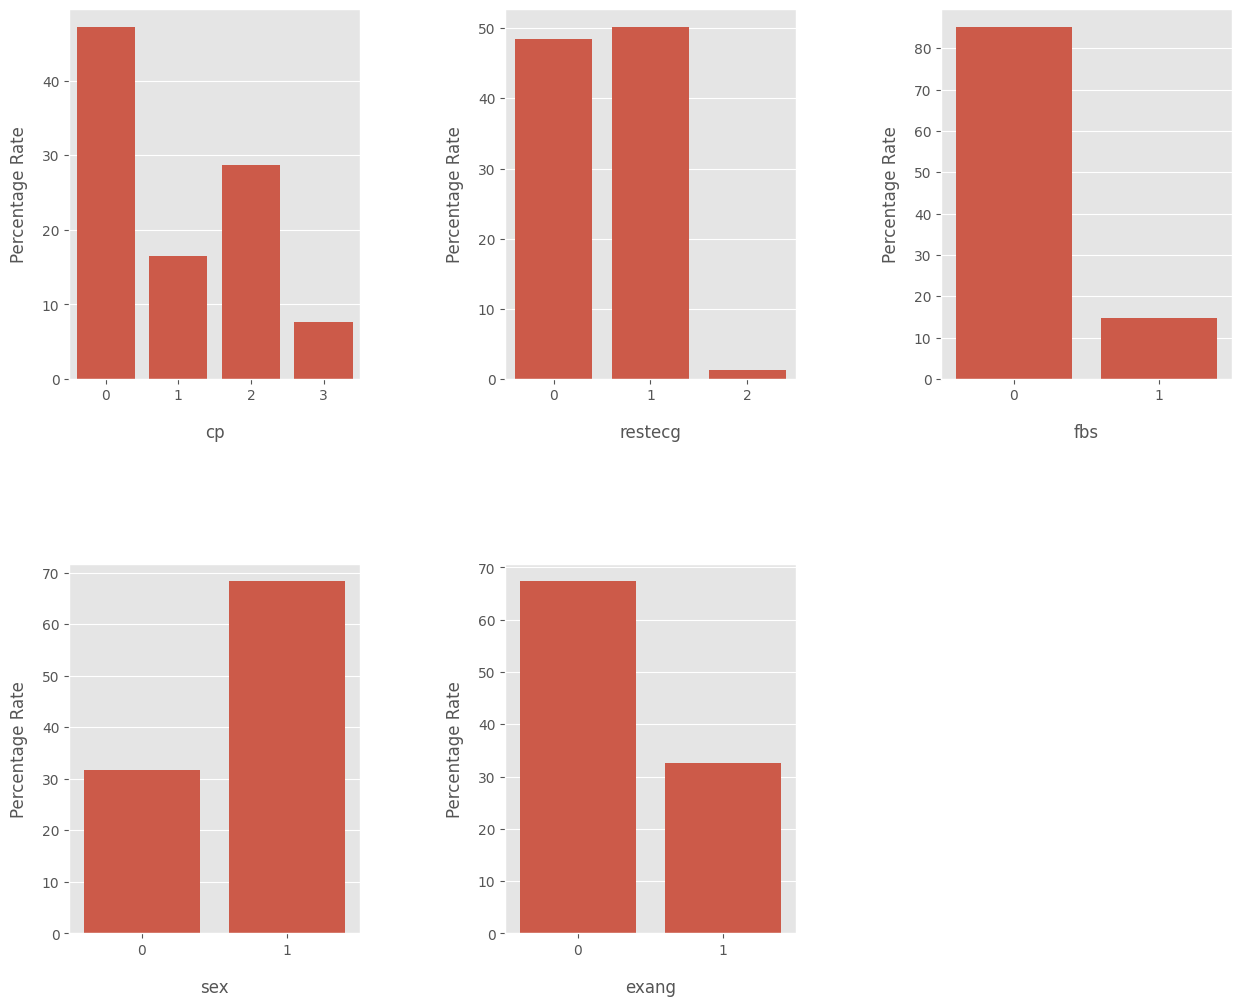

In [73]:
#From the below graphs we are able to analyze the percentage rate of categorical columns
category_list = ['cp', 'restecg', 'fbs', 'sex', 'exang']
counter = 1

plt.figure(figsize = (15, 12))

for col_list in category_list:
    series = round(((df[col_list].value_counts(dropna = False))/(len(df[col_list])) * 100), 2)
    plt.subplot(2, 3, counter)
    ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
    plt.xlabel(col_list, labelpad = 15)
    plt.ylabel('Percentage Rate', labelpad = 10)
    counter += 1

del category_list, counter, ax
plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.5)

plt.show()

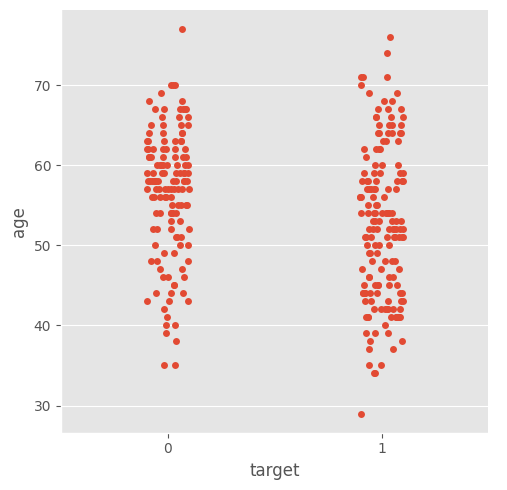

In [74]:
sns.catplot(x='target',y='age',data = df)
#Here we represented the scatter plot people who have heart disease according to the age. We cant infer any conclusion as all the age people

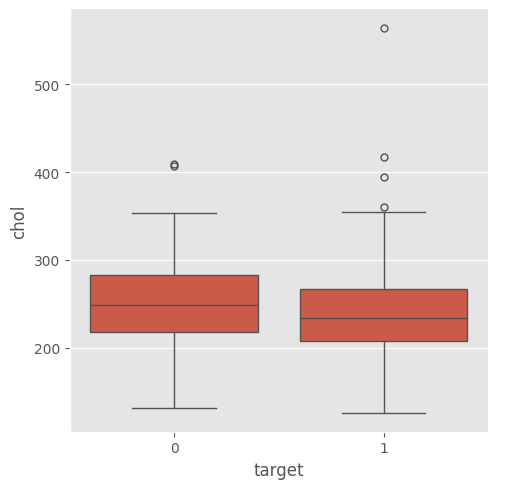

In [75]:
sns.catplot(x='target',y='chol',kind = 'box',data = df)
#From the below box plot we get the outliers. People who are having heart disease have more outliers in the plot

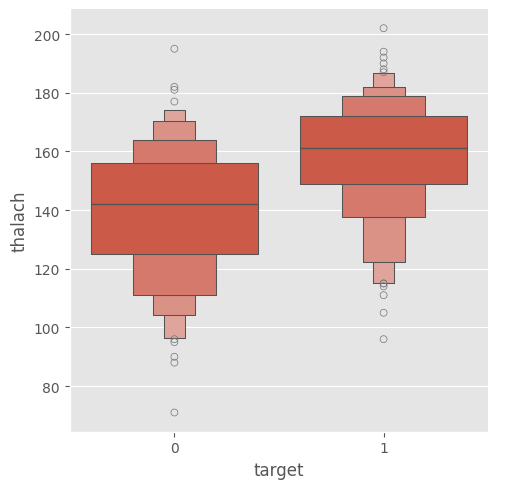

In [76]:
sns.catplot(x='target',y='thalach',kind = 'boxen',data = df)

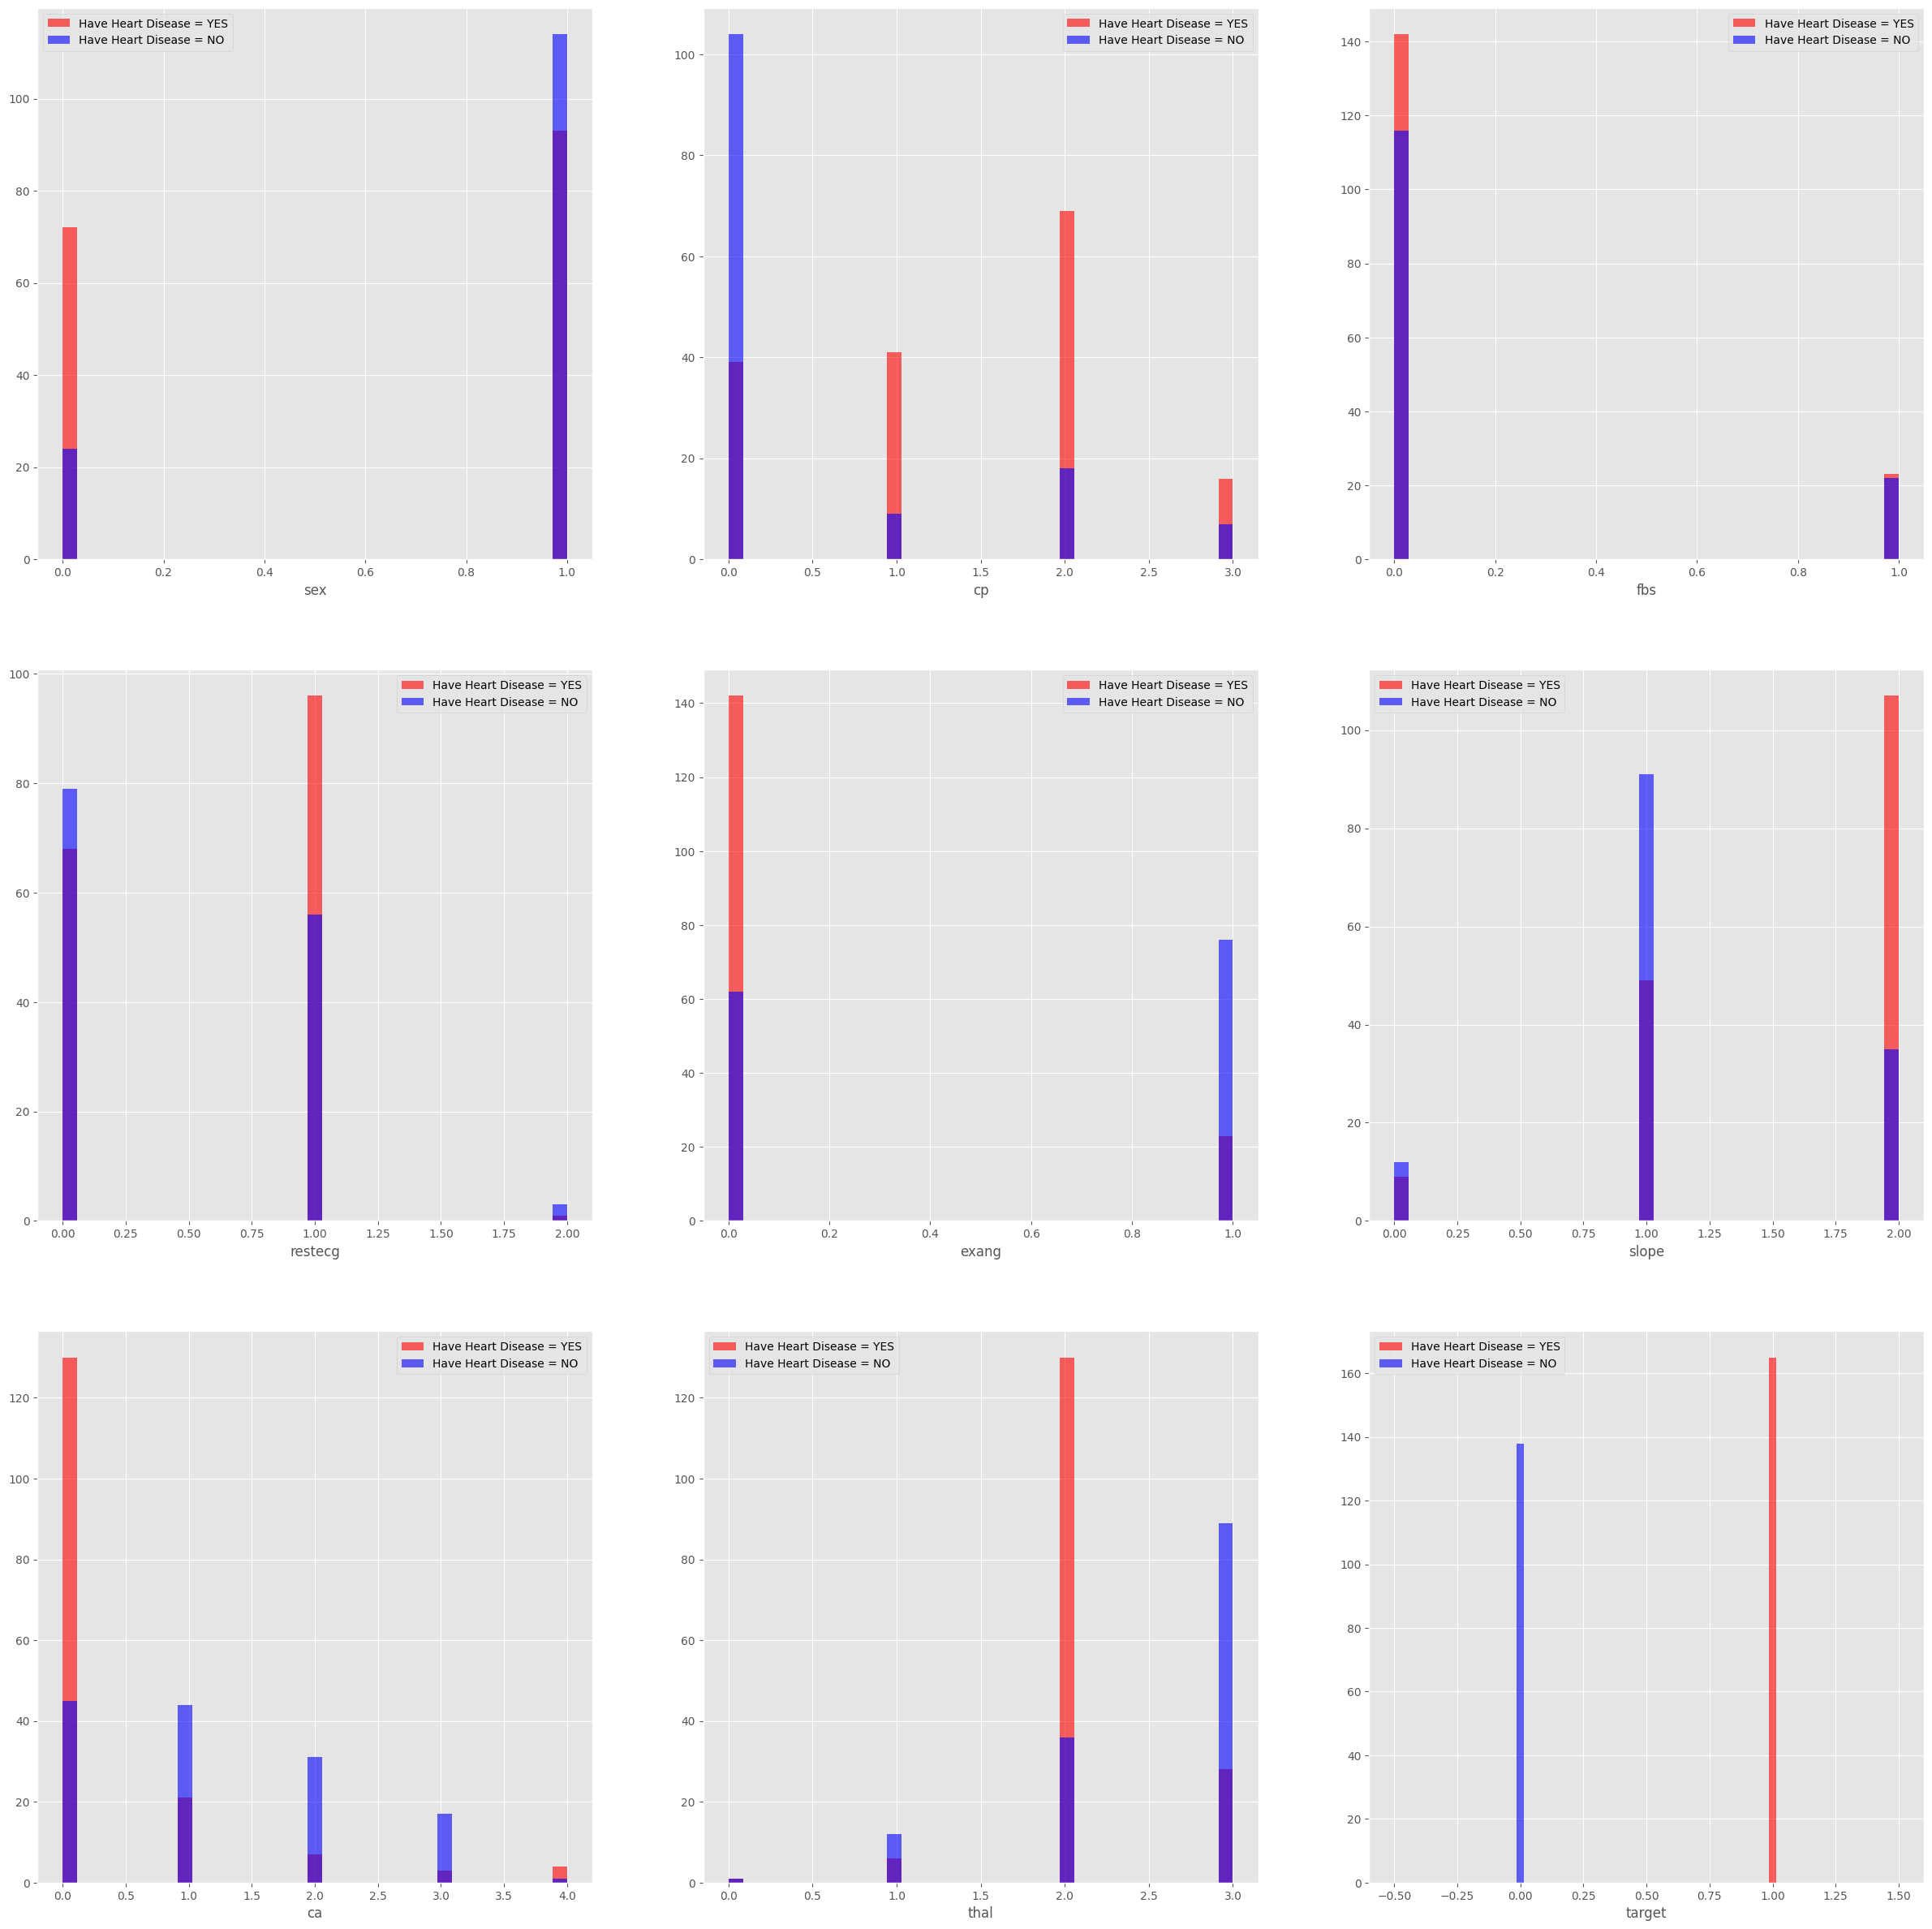

In [77]:
plt.figure(figsize=(30, 30))
for i, column in enumerate(catg_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

###    People with chest pain are likely to have heart disease.
###    People with resting electrocardiographic result as 1 are more likely to have heart disease.
###    Exercise induced angia(exang): People with value 0 have heart disease more than patients having value 0
###    People with thalium stress result as 2 are having heart disease.

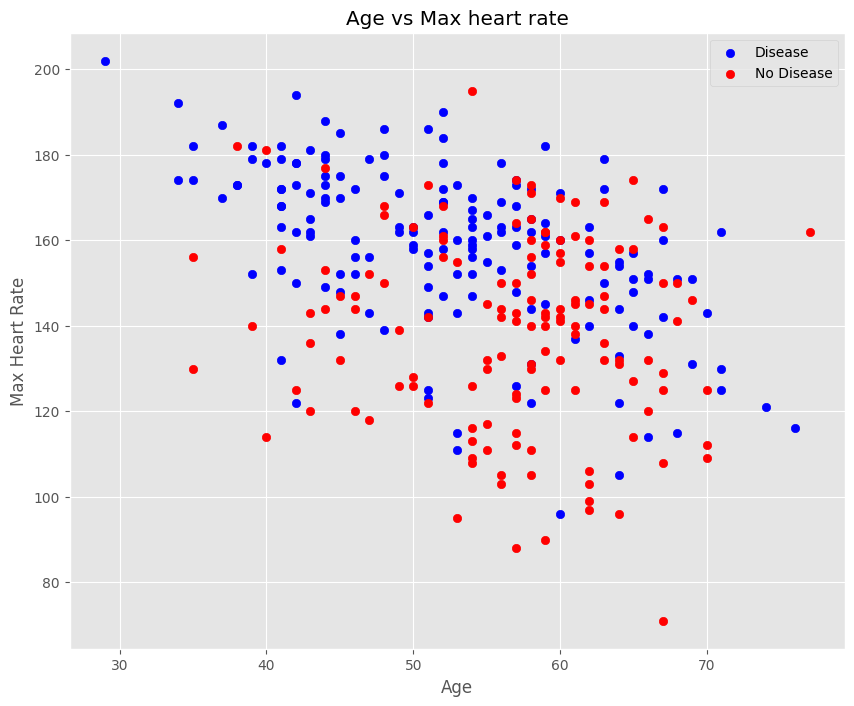

In [78]:
#Now let's observe Age vs Maximum heart rate when people have heart disease.
plt.figure(figsize=(10, 8))

plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="blue")
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="red")

plt.title("Age vs Max heart rate")
plt.xlabel("Age"); plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

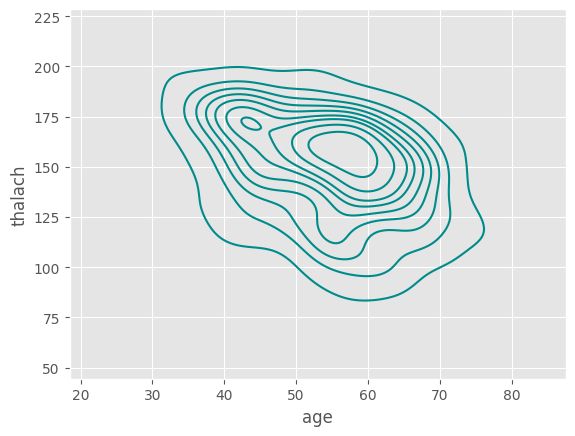

In [79]:
sns.kdeplot(x = 'age', y = 'thalach', data = df, color = 'darkcyan');

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
Name: count, dtype: int64


Text(0, 0.5, 'Age distribution')

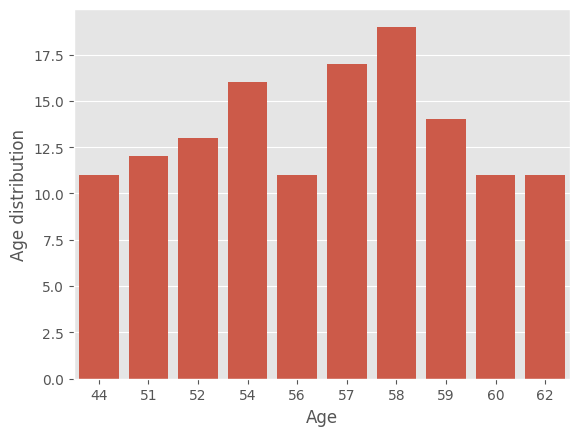

In [80]:
# Analyze distribution in age in range 10
print(df.age.value_counts()[:10])
sns.barplot(x=df.age.value_counts()[:10].index,y=df.age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Age distribution')

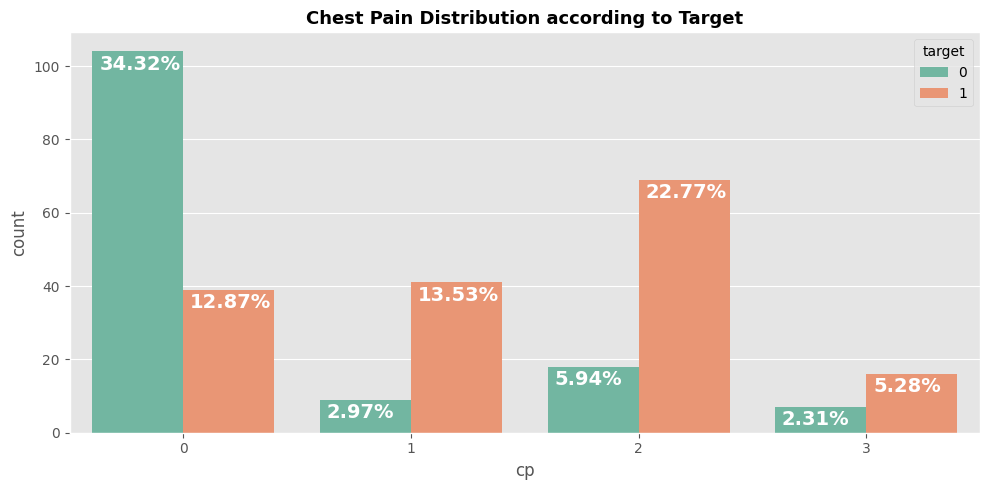

In [81]:
fig, ax = plt.subplots(figsize=(10,5))
name = df['cp']
ax = sns.countplot(x='cp', hue='target', data=df, palette='Set2')
ax.set_title("Chest Pain Distribution according to Target", fontsize = 13, weight = 'bold')

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

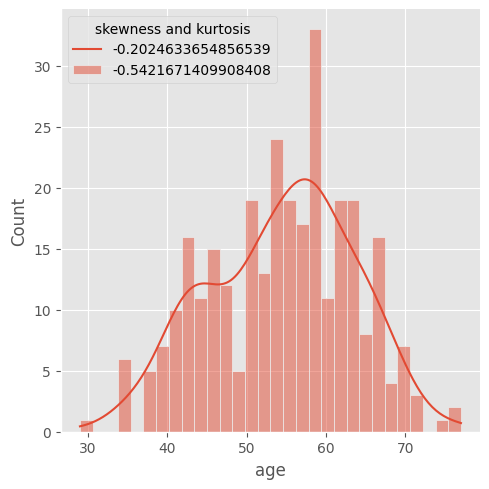

In [82]:
#create a distribution plot with normal distribution curve
sns.displot( x = 'age', data = df, bins = 30, kde = True)
skewness=str(df["age"].skew())
kurtosis=str(df["age"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show();

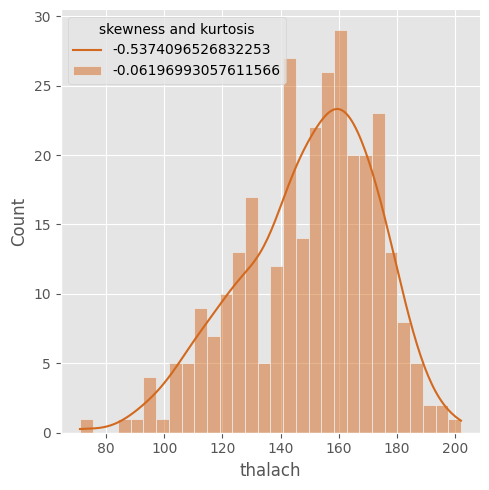

In [83]:
sns.displot(x = 'thalach', data = df, bins = 30, kde = True, color = 'chocolate')
skewness=str(df["thalach"].skew())
kurtosis=str(df["thalach"].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.show();

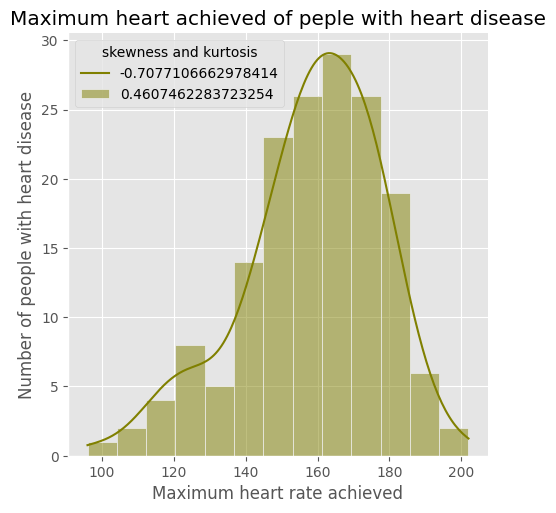

In [84]:
sns.displot(x = df.thalach[df.target==1], data = df, kde = True, color= 'olive')
skewness=str(df.thalach[df.target==1].skew())
kurtosis=str(df.thalach[df.target==1].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.title("Maximum heart achieved of peple with heart disease")
plt.xlabel("Maximum heart rate achieved")
plt.ylabel("Number of people with heart disease");

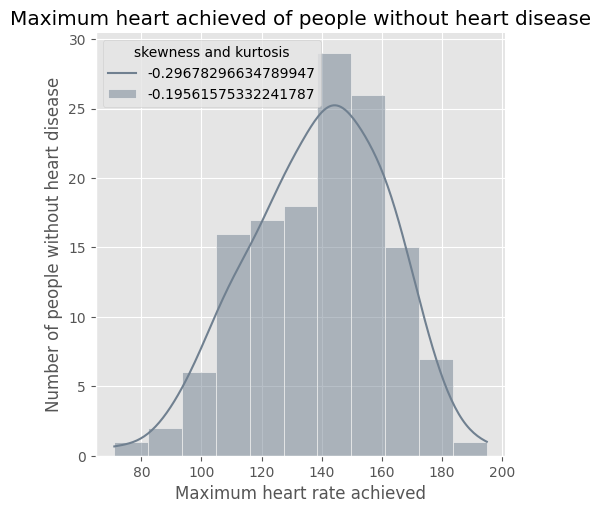

In [85]:
sns.displot(x = df.thalach[df.target==0], data = df, kde = True, color= 'slategray')
skewness=str(df.thalach[df.target==0].skew())
kurtosis=str(df.thalach[df.target==0].kurt())
plt.legend([skewness,kurtosis],title=("skewness and kurtosis"))
plt.title("Maximum heart achieved of people without heart disease")
plt.xlabel("Maximum heart rate achieved")
plt.ylabel("Number of people without heart disease");

(14.5, -0.5)

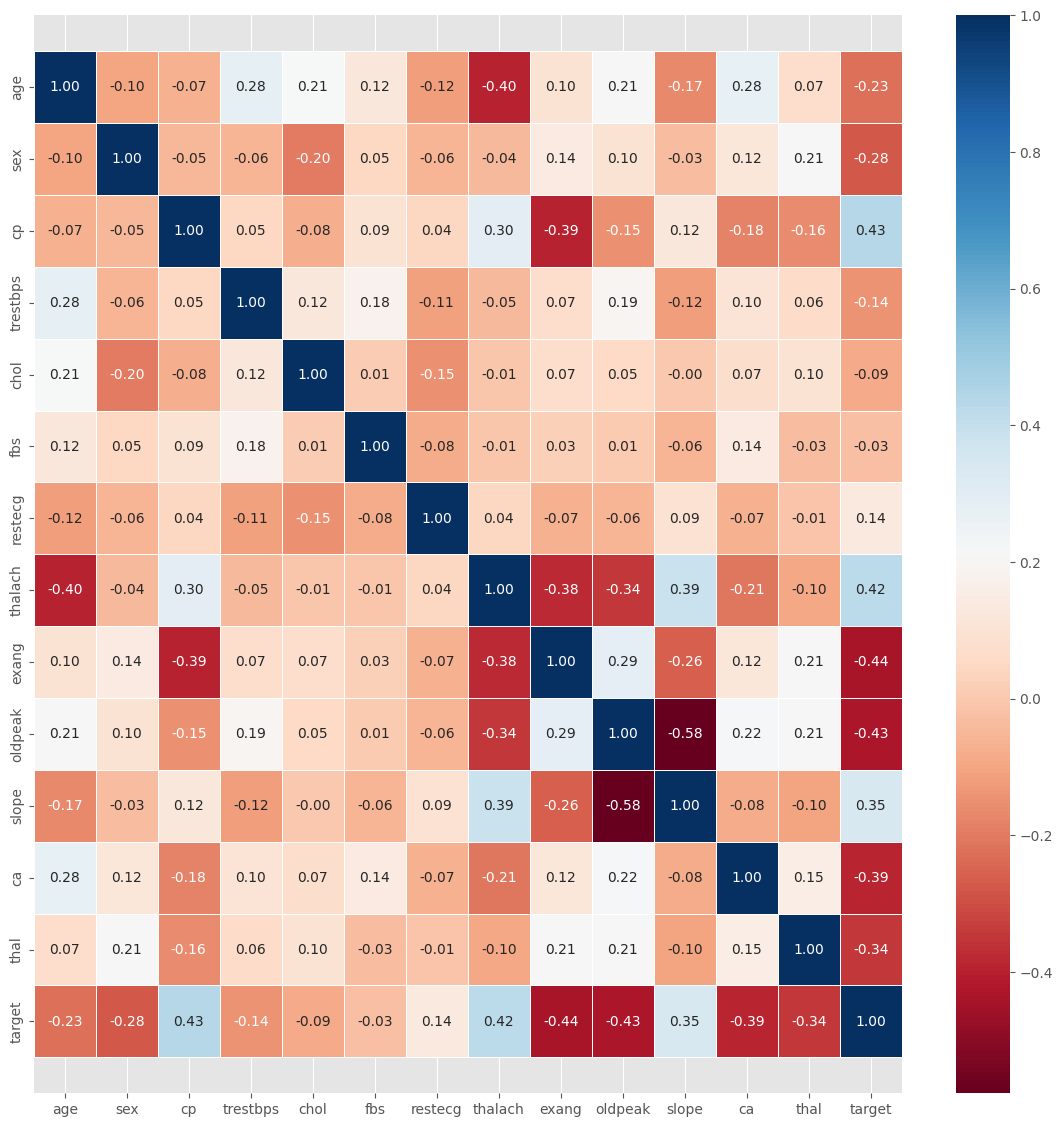

In [86]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(14, 14))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="RdBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#Measure of relationship between 2 variables

In [87]:
df.drop('target', axis=1).corrwith(df.target).hvplot.barh(
    width=600, height=400, 
    title="Correlation between Numeric Features and Heart Disease", 
    ylabel='Correlation', xlabel='Numerical Features',
)
#This shows relation between attributes and target variable. 
#People with chest pain type has more relationin judjing whether patient has heart disease or not

:Bars   [index]   (0)

In [88]:
#creating a new dataframe by making categorical columns to dummy columns 
catg_val.remove("target")
ds = pd.get_dummies(df, columns = catg_val)
ds.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,56,120,236,178,0.8,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,57,120,354,163,0.6,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


In [89]:
#Maximum absolute scaling
df_max_scaled = df.copy()
colscale=['age','chol','trestbps','oldpeak','thalach']

for column in colscale:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()

display(df_max_scaled)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.818182,1,3,0.725,0.413121,1,0,0.742574,0,0.370968,0,0,1,1
1,0.480519,1,2,0.650,0.443262,0,1,0.925743,0,0.564516,0,0,2,1
2,0.532468,0,1,0.650,0.361702,0,0,0.851485,0,0.225806,2,0,2,1
3,0.727273,1,1,0.600,0.418440,0,1,0.881188,0,0.129032,2,0,2,1
4,0.740260,0,0,0.600,0.627660,0,1,0.806931,1,0.096774,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.740260,0,0,0.700,0.427305,0,1,0.608911,1,0.032258,1,0,3,0
299,0.584416,1,3,0.550,0.468085,0,1,0.653465,0,0.193548,1,0,3,0
300,0.883117,1,0,0.720,0.342199,1,1,0.698020,0,0.548387,1,2,3,0
301,0.740260,1,0,0.650,0.232270,0,1,0.569307,1,0.193548,1,1,3,0


In [90]:
#Standard scaling
#Scaling of  age, chol,trestbps, thalach, oldpeak columns to reduce its range
ss=StandardScaler()
colscale=['age','chol','trestbps','oldpeak','thalach']
ds[colscale] = ss.fit_transform(ds[colscale])
ds.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


In [91]:
#Z scare Normalization
df_z_scaled = df.copy()
  
for column in df_z_scaled.columns:
    df_z_scaled[column] = (df_z_scaled[column] -
                           df_z_scaled[column].mean()) / df_z_scaled[column].std()    
 
df_z_scaled

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.950624,0.679881,1.969864,0.762694,-0.255910,2.390484,-1.004171,0.015417,-0.69548,1.085542,-2.270822,-0.713249,-2.145324,0.913019
1,-1.912150,0.679881,1.000921,-0.092585,0.072080,-0.416945,0.897478,1.630774,-0.69548,2.119067,-2.270822,-0.713249,-0.512075,0.913019
2,-1.471723,-1.465992,0.031978,-0.092585,-0.815424,-0.416945,-1.004171,0.975900,-0.69548,0.310399,0.974740,-0.713249,-0.512075,0.913019
3,0.179877,0.679881,0.031978,-0.662770,-0.198030,-0.416945,0.897478,1.237849,-0.69548,-0.206364,0.974740,-0.713249,-0.512075,0.913019
4,0.289984,-1.465992,-0.936965,-0.662770,2.078611,-0.416945,0.897478,0.582975,1.43311,-0.378618,0.974740,-0.713249,-0.512075,0.913019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.289984,-1.465992,-0.936965,0.477601,-0.101562,-0.416945,0.897478,-1.163356,1.43311,-0.723126,-0.648041,-0.713249,1.121174,-1.091653
299,-1.031296,0.679881,1.969864,-1.232956,0.342190,-0.416945,0.897478,-0.770432,-0.69548,0.138144,-0.648041,-0.713249,1.121174,-1.091653
300,1.501157,0.679881,-0.936965,0.705675,-1.027653,2.390484,0.897478,-0.377507,-0.69548,2.032940,-0.648041,1.242538,1.121174,-1.091653
301,0.289984,0.679881,-0.936965,-0.092585,-2.223854,-0.416945,0.897478,-1.512623,1.43311,0.138144,-0.648041,0.264644,1.121174,-1.091653


# Sampling Techniques

In [19]:
#Simple Random Samping
# sample (n,axis)
simple_random_sample = df.sample(n=4).sort_values(by='chol')
simple_random_mean = round(simple_random_sample['target'].mean(),3)
print(simple_random_mean)

simple_random_sample

0.25


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
77,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2,0


In [24]:
#Startified Sampling
df.groupby('cp',group_keys=False).apply(lambda x:x.sample(frac=0.29))

/var/folders/y7/wqfcxdcd1ngc8s_w8b70mqg80000gn/T/ipykernel_725/3010225833.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('cp',group_keys=False).apply(lambda x:x.sample(frac=0.29))


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
224,54,1,0,110,239,0,1,126,1,2.8,1,1,3,0
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
222,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2,1


In [27]:
#systematic sampling

def systematic_sampling(df, step):
    
    indexes = np.arange(0,len(df),step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample

systematic_sample = systematic_sampling(df, 3)

systematic_mean = round(systematic_sample['target'].mean(),5)

systematic_sample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0


In [28]:
#Cluster Sampling
clusters = np.random.choice(np.arange(1,11), size=4, replace=False)
cluster_sample = df[df['target'].isin(clusters)]
cluster_mean = round(cluster_sample['target'].mean(),3)
cluster_sample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


/var/folders/y7/wqfcxdcd1ngc8s_w8b70mqg80000gn/T/ipykernel_725/1225937258.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.normal(size=1000), hist=False)


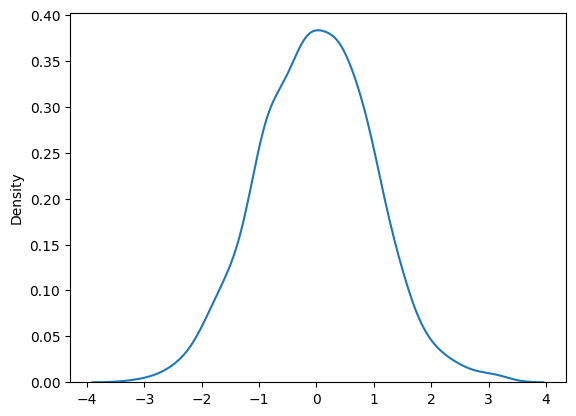

In [29]:
#normal distribution
from numpy import random
sns.distplot(random.normal(size=1000), hist=False)
plt.show()

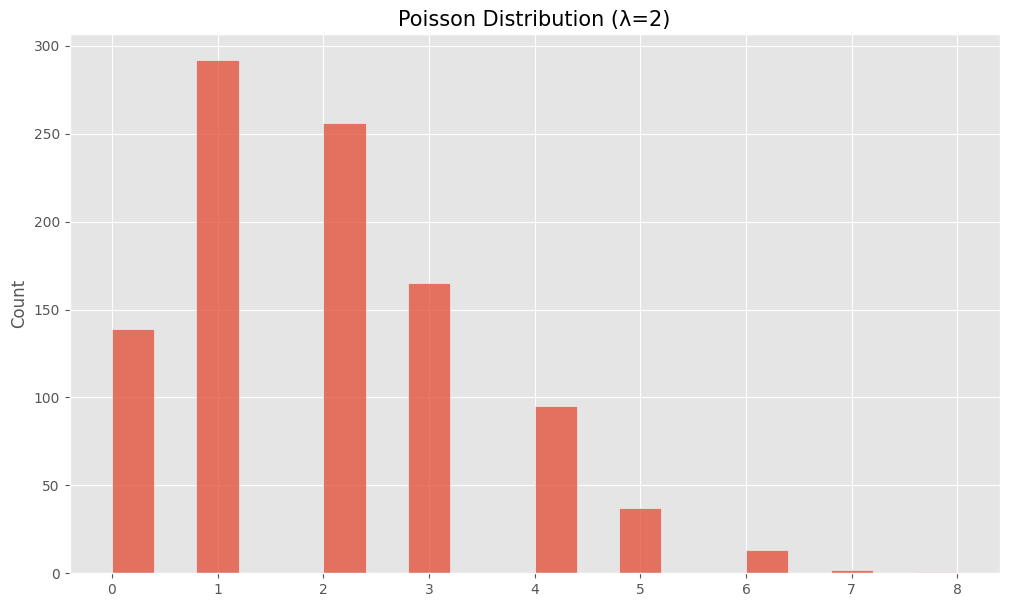

In [97]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate Poisson distribution
data = np.random.poisson(lam=2, size=1000)

# Plot
plt.figure(figsize=(12, 7))
sns.histplot(data, kde=False)
plt.title('Poisson Distribution (λ=2)', fontsize=15)
plt.show()


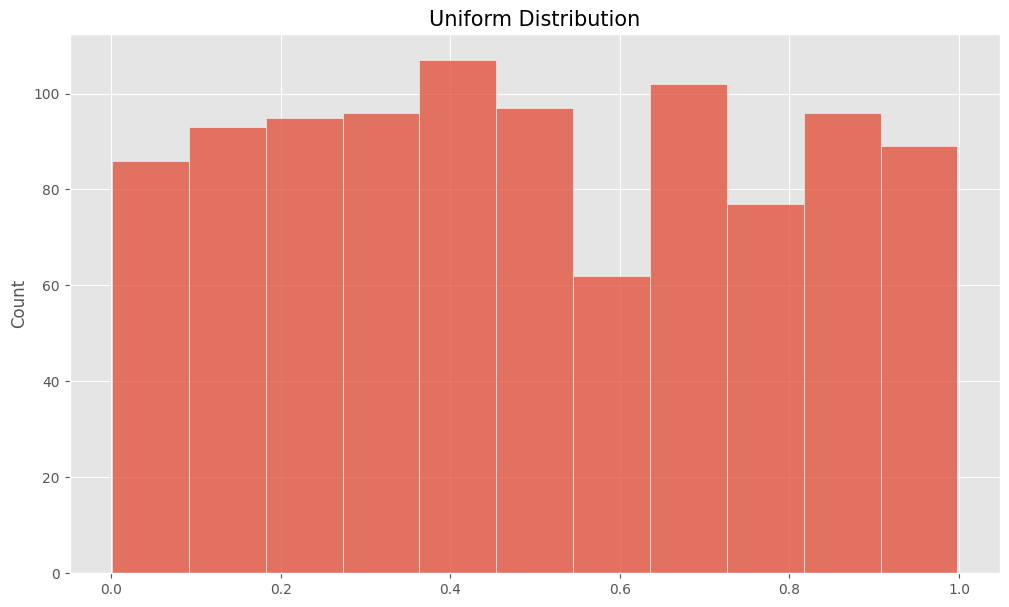

In [98]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate Uniform distribution
data = np.random.uniform(size=1000)

# Plot
plt.figure(figsize=(12, 7))
sns.histplot(data, kde=False)
plt.title('Uniform Distribution', fontsize=15)
plt.show()


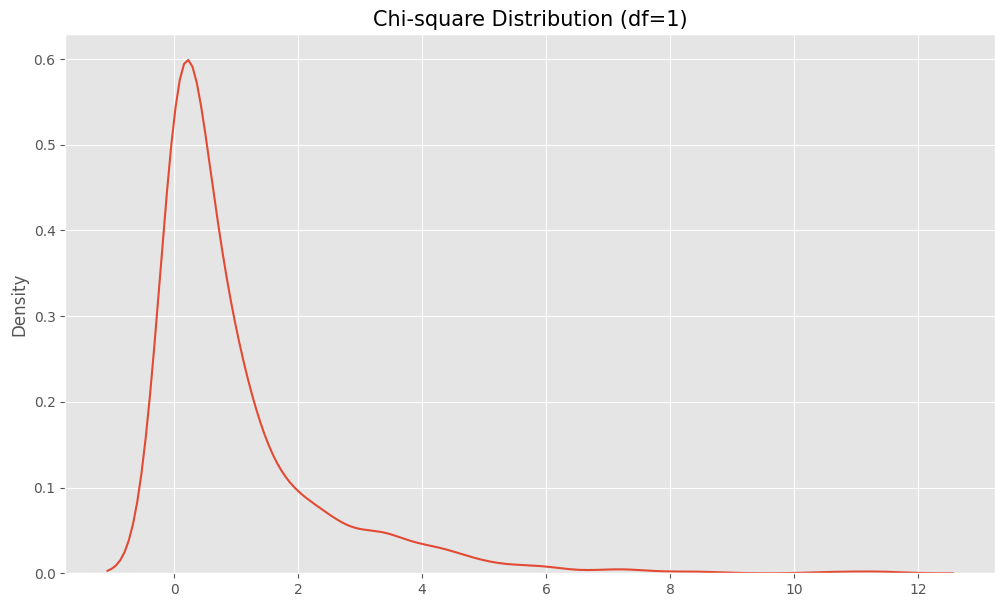

In [99]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate Chi-square distribution
data = np.random.chisquare(df=1, size=1000)

# Plot
plt.figure(figsize=(12, 7))
sns.kdeplot(data)  # Density plot
plt.title('Chi-square Distribution (df=1)', fontsize=15)
plt.show()


In [30]:
from sklearn.model_selection import train_test_split
import numpy as np

# Example dataset (assuming df is already loaded)
y = df['target'].values
x_data = df.drop(['target'], axis=1)

# Normalize without using .values
x = (x_data - x_data.min()) / (x_data.max() - x_data.min())

# Split the dataset: 80% training, 20% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [33]:
#KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print("2 NN Score: ",knn.score(x_test, y_test)*100)

2 NN Score:  83.60655737704919


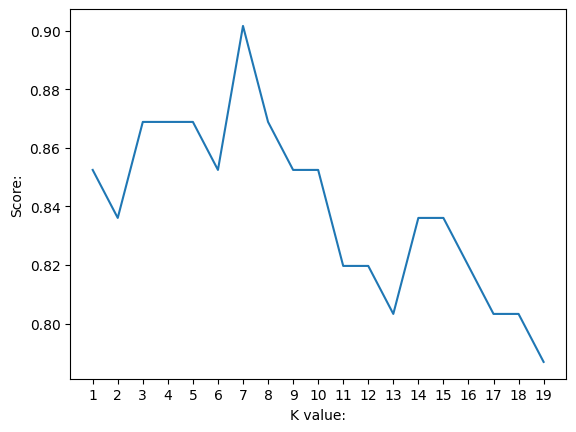

In [34]:
#Best K value::
score = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train, y_train)
    score.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,20), score)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value:")
plt.ylabel("Score:")
plt.show()

In [35]:
accuracies = {}
times={}
acc = max(score)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is :",acc)

Maximum KNN Score is : 90.1639344262295


In [36]:
import time
knn = KNeighborsClassifier(n_neighbors = 7)
start=time.time()
knn.fit(x_train,y_train)
accuracy = knn.score(x_test, y_test)*100
stop=time.time()
times['KNN']=stop-start
accuracies['KNN']=accuracy
print("7 NN Score: ",accuracy)
print("Time taken : ",times['KNN'])

7 NN Score:  90.1639344262295
Time taken :  0.009717941284179688


*******************Logistic Regression*******************
Accuracy of the model =  0.8360655737704918
Precision =  0.8157894736842105
Recall =  0.9117647058823529
F1 - Score =  0.8611111111111112
ROC_AUC Score =  0.8262527233115468

Confusion Matrix


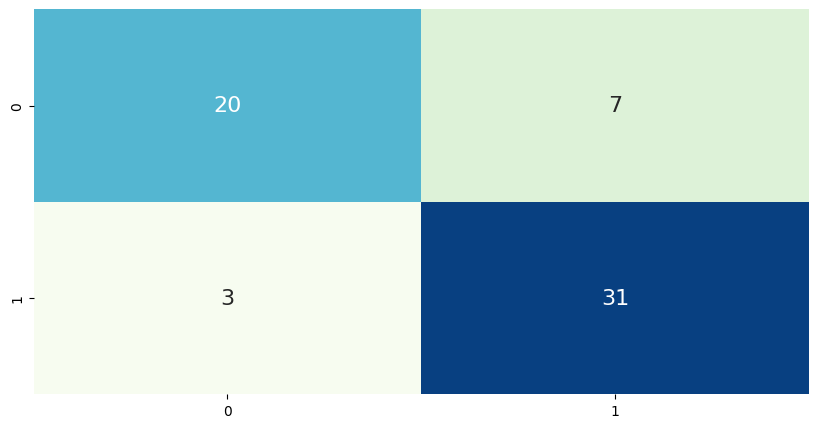

In [38]:
from sklearn import linear_model
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, precision_score, f1_score,roc_auc_score
regr = linear_model.LogisticRegression()
regr = regr.fit(x_train, y_train)

y_pred = regr.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("*******************Logistic Regression*******************")
print("Accuracy of the model = ",accuracy)
print("Precision = ",precision)
print("Recall = ",recall)
print("F1 - Score = ",f1)
print("ROC_AUC Score = ",roc_auc)

print("\nConfusion Matrix")
conf_matx = confusion_matrix(y_test, y_pred)
# Display the Confusion Matrix...
fig, axes = plt.subplots(1,1,figsize = (10, 5))
sns.heatmap(conf_matx, annot=True, annot_kws={"size": 16},fmt='g', cbar=False, cmap="GnBu", ax=axes)
plt.show()

In [39]:
import pickle
import os

# Create model directory
os.makedirs('models', exist_ok=True)

# Save the best KNN model
best_model_data = {
    'model': knn,  
    'description': 'KNN model for heart disease prediction with n_neighbors=7'
}

# Save the model to a pickle file
with open('models/heart_prediction_model.pkl', 'wb') as f:
    pickle.dump(best_model_data, f)

print("Model saved successfully to 'models/heart_prediction_model.pkl'")


Model saved successfully to 'models/heart_prediction_model.pkl'


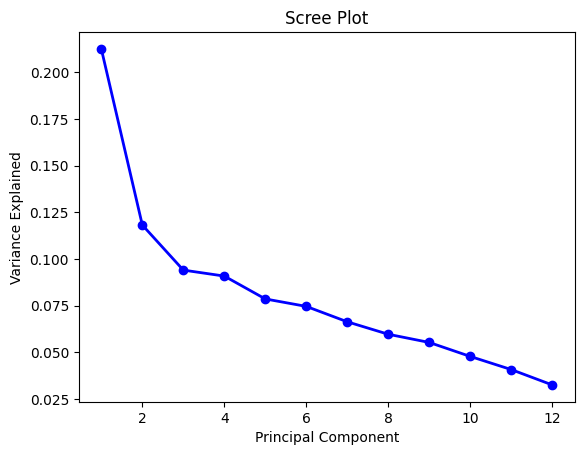

[0.21254053 0.11820708 0.09406418 0.09085735 0.07861281 0.07461661
 0.06636692 0.05968811 0.05530196 0.04781309 0.04077729 0.03254941]


In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Normalize the data
X = df.drop('target', axis=1)  # Correct syntax
y = df['target']

# Standardize the features
X_normalised = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=12)
X_reduced = pca.fit_transform(X_normalised)

# Scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

# Print explained variance ratio
print(pca.explained_variance_ratio_)


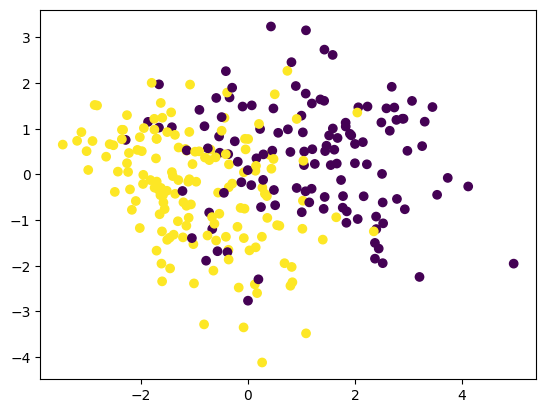

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_normalised, y, test_size=0.1, random_state=101)
X_, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

pca = PCA(n_components=3, random_state=123)
pca.fit(X_train)
pca_result = pca.transform(X_train)

plt.scatter(pca_result[:,0], pca_result[:,1] , c=y_train, cmap='viridis')

In [109]:
import pandas as pd

# Convert y_train to NumPy array to ensure proper indexing
y_train_array = y_train.to_numpy()

# Initialize list to store rows
rows = []

# Loop through PCA results and create dictionary rows
for i in range(len(pca_result)):
    rows.append({
        "PC1": pca_result[i, 0],
        "PC2": pca_result[i, 1],
        "PC3": pca_result[i, 2],
        "Label": "Disease" if y_train_array[i] == 0 else "Healthy"
    })

# Create DataFrame from list of dictionaries
final_df_3PCs = pd.DataFrame(rows)

# Display the result
print(final_df_3PCs.head())



        PC1       PC2       PC3    Label
0  0.403227  0.428749  0.611206  Healthy
1  1.026927  0.919882  1.403591  Disease
2 -0.343010  1.684342  0.247342  Disease
3 -1.308732 -1.026139 -0.103223  Healthy
4  0.140548  0.079084 -1.532075  Healthy
